In [85]:
import import_files as MrtRecommendationDependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import database
from datetime import datetime
import numpy as np

In [86]:
#RandomForest Regression Algorithm
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

#Linear Regression Algorithm for Comparison
from sklearn.linear_model import LinearRegression

#Preprocessing Steps
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

#Pipeline
from sklearn.pipeline import Pipeline

#Cross Validation Score
from sklearn.model_selection import cross_val_score, train_test_split

from sklearn.decomposition import PCA

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans

In [87]:
train_df = pd.read_csv(MrtRecommendationDependencies.get_dataset_path("train_updates_with_ridership.csv"))

In [88]:
train_df.head()

,num_train_running,num_train_operational,num_dalian_train_running,num_dalian_train_operational,headway,entry,exit,temp,humidity,rain_1h,rain_3h
0,12.0,13.0,0.0,0.0,8.5,1595.615385,1720.384615,26.41,87,0.0,0.0
1,8.0,8.0,0.0,0.0,8.0,861.846154,284.538462,31.29,60,0.0,0.0
2,15.0,15.0,0.0,0.0,7.0,1903.923077,1857.076923,27.23,84,0.0,0.0
3,7.0,7.0,0.0,0.0,8.0,906.153846,318.538462,30.09,66,0.0,0.0
4,14.0,14.0,0.0,0.0,7.5,1536.538462,1414.230769,26.11,87,0.0,0.0


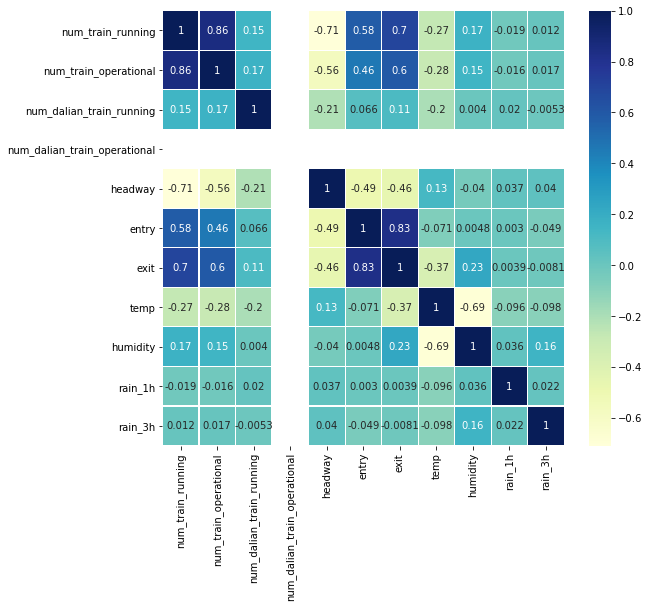

In [89]:
corrmat = train_df.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1,annot=True) 

In [90]:
X = train_df.drop(['num_train_running', 'num_train_operational', 'num_dalian_train_running', 'num_dalian_train_operational', 'headway'], axis=1)
X_operational = train_df.drop(['num_train_running', 'num_train_operational', 'num_dalian_train_running', 'num_dalian_train_operational', 'headway'], axis=1)
X_running = train_df.drop(['num_train_running','num_train_operational', 'num_dalian_train_running', 'num_dalian_train_operational', 'headway'], axis=1)
X_headway = train_df.drop(['num_dalian_train_running', 'num_dalian_train_operational', 'headway'], axis=1)
Y_operational = train_df['num_train_operational']
Y_running = train_df['num_train_running']
Y_headway = train_df['headway']

In [71]:
scaler = Normalizer()
regressor = GradientBoostingRegressor()

train_model = Pipeline([('scaler', scaler), ('regressor', regressor)])

grid_param_grid_train = {'regressor__random_state': [35],
                   'regressor__n_estimators': [*range(20,61)]
                  }

grid_search_train = GridSearchCV(train_model,param_grid=grid_param_grid_train,cv=5,scoring="r2")

In [72]:
grid_search_train.fit(X,Y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', Normalizer()),
                                       ('regressor',
                                        GradientBoostingRegressor())]),
             param_grid={'regressor__n_estimators': [20, 21, 22, 23, 24, 25, 26,
                                                     27, 28, 29, 30, 31, 32, 33,
                                                     34, 35, 36, 37, 38, 39, 40,
                                                     41, 42, 43, 44, 45, 46, 47,
                                                     48, 49, ...],
                         'regressor__random_state': [35]},
             scoring='r2')

In [73]:
print(grid_search_train.best_estimator_)
print(grid_search_train.best_score_)

Pipeline(steps=[('scaler', Normalizer()),
                ('regressor',
                 GradientBoostingRegressor(n_estimators=35, random_state=35))])
0.5343945466983525


In [79]:
scaler = Normalizer()
regressor = GradientBoostingRegressor()

headway_model = Pipeline([('scaler', scaler), ('regressor', regressor)])

grid_param_grid_headway = { 'regressor': [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()],
                   'regressor__random_state': [35],
                   'regressor__n_estimators': [*range(20,61)]
                  }

grid_search_headway = GridSearchCV(train_model,param_grid=grid_param_grid_headway,cv=5,scoring="r2")
X_headway = X.copy()
X_headway['num_train_running'] = Y_train

grid_search_headway.fit(X_headway, Y_headway)

print(grid_search_headway.best_estimator_)
print(grid_search_headway.best_score_)

KeyboardInterrupt: 

In [80]:
X_operational = train_df.drop(['num_train_running', 'num_train_operational', 'num_dalian_train_running', 'num_dalian_train_operational', 'headway'], axis=1)
X_running = train_df.drop(['num_train_operational', 'num_dalian_train_running', 'num_dalian_train_operational', 'headway'], axis=1)
X_headway = train_df.drop(['num_dalian_train_running', 'num_dalian_train_operational', 'headway'], axis=1)
Y_operational = train_df['num_train_operational']
Y_running = train_df['num_train_running']
Y_headway = train_df['headway']

In [81]:
scaler = Normalizer()
regressor = GradientBoostingRegressor()

headway_model = Pipeline([('scaler', scaler), ('regressor', regressor)])

grid_param_grid_headway = { 'regressor': [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()],
                   'regressor__random_state': [35],
                   'regressor__n_estimators': [*range(20,61)]
                  }

grid_search_headway = GridSearchCV(train_model,param_grid=grid_param_grid_headway,cv=5,scoring="r2")

grid_search_headway.fit(X_headway, Y_headway)

print(grid_search_headway.best_estimator_)
print(grid_search_headway.best_score_)

Pipeline(steps=[('scaler', Normalizer()),
                ('regressor',
                 RandomForestRegressor(n_estimators=59, random_state=35))])
0.6749400159595639


In [91]:
scaler = Normalizer()
regressor = GradientBoostingRegressor()

headway_model = Pipeline([('scaler', scaler), ('regressor', regressor)])

grid_param_grid_headway = { 'regressor': [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()],
                   'regressor__random_state': [35],
                   'regressor__n_estimators': [*range(20,61)]
                  }

grid_search_headway = GridSearchCV(train_model,param_grid=grid_param_grid_headway,cv=5,scoring="r2")

grid_search_headway.fit(X_running, Y_running)

print(grid_search_headway.best_estimator_)
print(grid_search_headway.best_score_)

Pipeline(steps=[('scaler', Normalizer()),
                ('regressor',
                 GradientBoostingRegressor(n_estimators=35, random_state=35))])
0.5343945466983525


In [83]:
scaler = Normalizer()
regressor = GradientBoostingRegressor()

headway_model = Pipeline([('scaler', scaler), ('regressor', regressor)])

grid_param_grid_headway = { 'regressor': [RandomForestRegressor(), AdaBoostRegressor(), GradientBoostingRegressor()],
                   'regressor__random_state': [35],
                   'regressor__n_estimators': [*range(20,61)]
                  }

grid_search_headway = GridSearchCV(train_model,param_grid=grid_param_grid_headway,cv=5,scoring="r2")

grid_search_headway.fit(X_operational, Y_operational)

print(grid_search_headway.best_estimator_)
print(grid_search_headway.best_score_)

Pipeline(steps=[('scaler', Normalizer()),
                ('regressor',
                 AdaBoostRegressor(n_estimators=57, random_state=35))])
0.3743539276761263


In [84]:
X_operational.head()

,entry,exit,temp,humidity,rain_1h,rain_3h
0,1595.615385,1720.384615,26.41,87,0.0,0.0
1,861.846154,284.538462,31.29,60,0.0,0.0
2,1903.923077,1857.076923,27.23,84,0.0,0.0
3,906.153846,318.538462,30.09,66,0.0,0.0
4,1536.538462,1414.230769,26.11,87,0.0,0.0
